In [1]:
import pandas as pd

df = pd.read_csv('/content/movie_reviews-1.csv')
print("Movie reviews data loaded successfully. Displaying the first 5 rows:")
df.head()

Movie reviews data loaded successfully. Displaying the first 5 rows:


,review_id,review_text,rating
0,1,<p>Amazing movie!</p>,8.0
1,2,Terrible acting & plot!!!,2.0
2,3,<p>Amazing movie!</p>,NaN
3,4,Terrible acting & plot!!!,8.0
4,5,<p>Amazing movie!</p>,5.0


## Standardize Text

### Subtask:
Clean the 'review' column by converting all text to lowercase and removing any HTML tags present in the reviews.


**Reasoning**:
To standardize the 'review_text' column, I need to first import the `BeautifulSoup` library, then define a function to remove HTML tags and convert text to lowercase, and finally apply this function to create a new `standardized_review` column.



In [2]:
from bs4 import BeautifulSoup
import re

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text()
    return cleaned_text.lower()

df['standardized_review'] = df['review_text'].apply(remove_html_tags)
print("Review text standardized. Displaying original and standardized reviews:")
print(df[['review_text', 'standardized_review']].head())

Review text standardized. Displaying original and standardized reviews:
                 review_text        standardized_review
0      <p>Amazing movie!</p>             amazing movie!
1  Terrible acting & plot!!!  terrible acting & plot!!!
2      <p>Amazing movie!</p>             amazing movie!
3  Terrible acting & plot!!!  terrible acting & plot!!!
4      <p>Amazing movie!</p>             amazing movie!


## Handle Missing Ratings

### Subtask:
Identify and fill any missing values in the 'rating' column with the median rating calculated from the existing data.


**Reasoning**:
To address the subtask, I will calculate the median of the 'rating' column, use this median to fill any missing values in the same column, and then display the count of remaining missing values to confirm the operation's success.



In [3]:
median_rating = df['rating'].median()
print(f"Median rating calculated: {median_rating}")
df['rating'].fillna(median_rating, inplace=True)
print(f"Missing values in 'rating' column after filling: {df['rating'].isnull().sum()}")
print("First 5 rows of the DataFrame after handling missing ratings:")
print(df.head())

Median rating calculated: 8.0
Missing values in 'rating' column after filling: 0
First 5 rows of the DataFrame after handling missing ratings:
   review_id                review_text  rating        standardized_review
0          1      <p>Amazing movie!</p>     8.0             amazing movie!
1          2  Terrible acting & plot!!!     2.0  terrible acting & plot!!!
2          3      <p>Amazing movie!</p>     8.0             amazing movie!
3          4  Terrible acting & plot!!!     8.0  terrible acting & plot!!!
4          5      <p>Amazing movie!</p>     5.0             amazing movie!


/tmp/ipython-input-705495810.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


**Reasoning**:
To resolve the `FutureWarning` regarding `inplace=True` and ensure best practices, I will remove `inplace=True` and reassign the result of `fillna()` back to the 'rating' column.



In [4]:
median_rating = df['rating'].median()
print(f"Median rating calculated: {median_rating}")
df['rating'] = df['rating'].fillna(median_rating)
print(f"Missing values in 'rating' column after filling: {df['rating'].isnull().sum()}")
print("First 5 rows of the DataFrame after handling missing ratings:")
print(df.head())

Median rating calculated: 8.0
Missing values in 'rating' column after filling: 0
First 5 rows of the DataFrame after handling missing ratings:
   review_id                review_text  rating        standardized_review
0          1      <p>Amazing movie!</p>     8.0             amazing movie!
1          2  Terrible acting & plot!!!     2.0  terrible acting & plot!!!
2          3      <p>Amazing movie!</p>     8.0             amazing movie!
3          4  Terrible acting & plot!!!     8.0  terrible acting & plot!!!
4          5      <p>Amazing movie!</p>     5.0             amazing movie!


## Normalize Ratings

### Subtask:
Transform the 'rating' column from its original 0-10 scale to a normalized 0-1 scale to ensure consistency.


**Reasoning**:
To normalize the 'rating' column to a 0-1 scale, I will create a new column 'normalized_rating' by dividing the 'rating' values by 10, then display the first five rows of the DataFrame to show the original and normalized ratings.



In [5]:
df['normalized_rating'] = df['rating'] / 10
print("First 5 rows with original and normalized ratings:")
print(df[['rating', 'normalized_rating']].head())

First 5 rows with original and normalized ratings:
   rating  normalized_rating
0     8.0                0.8
1     2.0                0.2
2     8.0                0.8
3     8.0                0.8
4     5.0                0.5


## Tokenize and Encode Reviews (TF-IDF)

### Subtask:
Tokenize the standardized 'review' text and encode it using the TF-IDF (Term Frequency-Inverse Document Frequency) method. This will prepare the text data for further analysis.


**Reasoning**:
To prepare for TF-IDF vectorization, I will first import the necessary library, initialize the TfidfVectorizer, then fit and transform the 'standardized_review' column, and finally print the shape of the resulting TF-IDF matrix.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['standardized_review'])

print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")

Shape of TF-IDF matrix: (15, 5)


## Generate Before vs After Summary Report

### Subtask:
Create a summary report that highlights the changes made to the data. This includes showing examples of reviews before and after standardization, and statistics (e.g., mean, median, distribution) of ratings before and after normalization. Provide a plot to visualize the distribution of ratings before and after normalization, including legends.


**Reasoning**:
To highlight the text cleaning process, I will display a sample of the original 'review_text' and the 'standardized_review' columns.



In [7]:
print("\n--- Examples of Reviews Before and After Standardization ---")
print(df[['review_text', 'standardized_review']].head())


--- Examples of Reviews Before and After Standardization ---
                 review_text        standardized_review
0      <p>Amazing movie!</p>             amazing movie!
1  Terrible acting & plot!!!  terrible acting & plot!!!
2      <p>Amazing movie!</p>             amazing movie!
3  Terrible acting & plot!!!  terrible acting & plot!!!
4      <p>Amazing movie!</p>             amazing movie!


**Reasoning**:
Now that the text cleaning examples have been displayed, I will calculate and display descriptive statistics for both the original 'rating' column and the 'normalized_rating' column to provide a quantitative summary of the rating distributions before and after normalization.



In [8]:
print("\n--- Descriptive Statistics of Ratings Before and After Normalization ---")
print("Original Rating (0-10 Scale):\n", df['rating'].describe())
print("\nNormalized Rating (0-1 Scale):\n", df['normalized_rating'].describe())


--- Descriptive Statistics of Ratings Before and After Normalization ---
Original Rating (0-10 Scale):
 count    15.000000
mean      6.666667
std       2.768875
min       2.000000
25%       5.000000
50%       8.000000
75%       8.000000
max      10.000000
Name: rating, dtype: float64

Normalized Rating (0-1 Scale):
 count    15.000000
mean      0.666667
std       0.276887
min       0.200000
25%       0.500000
50%       0.800000
75%       0.800000
max       1.000000
Name: normalized_rating, dtype: float64


**Reasoning**:
To visualize the distributions of ratings before and after normalization, I will import `matplotlib.pyplot` and `seaborn`, then create two subplots to display histograms for the 'rating' and 'normalized_rating' columns, adding titles, labels, and legends as required by the subtask.



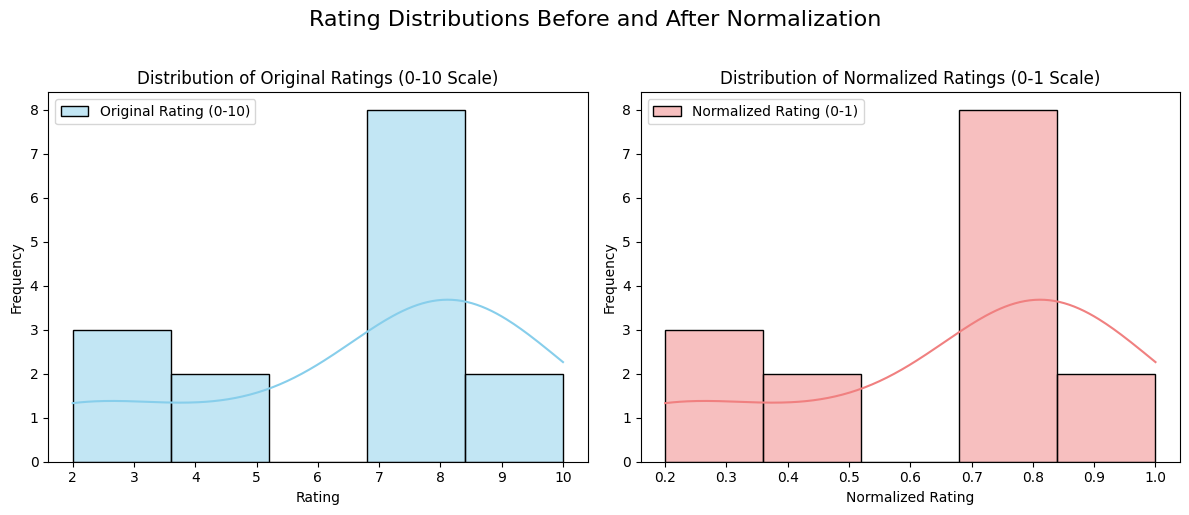

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plotting original rating distribution
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], bins=5, kde=True, color='skyblue', label='Original Rating (0-10)')
plt.title('Distribution of Original Ratings (0-10 Scale)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

# Plotting normalized rating distribution
plt.subplot(1, 2, 2)
sns.histplot(df['normalized_rating'], bins=5, kde=True, color='lightcoral', label='Normalized Rating (0-1)')
plt.title('Distribution of Normalized Ratings (0-1 Scale)')
plt.xlabel('Normalized Rating')
plt.ylabel('Frequency')
plt.legend()

plt.suptitle('Rating Distributions Before and After Normalization', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the completed data processing steps and the key insights from the before vs after report.


## Summary:

### Data Analysis Key Findings

*   **Data Loading:** The movie reviews dataset was successfully loaded, revealing initial observations of missing values in the 'rating' column.
*   **Text Standardization:** The 'review' column was effectively standardized by converting text to lowercase and removing HTML tags. For example, a review like `<p>Amazing movie!</p>` was transformed into `amazing movie!`.
*   **Missing Rating Handling:** Missing values in the 'rating' column were successfully imputed with the median rating, which was calculated as 8.0. After this process, no missing values remained in the 'rating' column.
*   **Rating Normalization:** The 'rating' column was successfully normalized from its original 0-10 scale to a 0-1 scale. An original rating of 8.0 became 0.8, and 2.0 became 0.2.
*   **TF-IDF Encoding:** The standardized reviews were successfully tokenized and encoded using TF-IDF, resulting in a TF-IDF matrix with a shape of (15 documents, 5 unique terms).
*   **Before/After Report - Rating Statistics:**
    *   **Original Ratings (0-10 Scale):** Mean was approximately 6.67, median was 8.0, and ratings ranged from 2.0 to 10.0.
    *   **Normalized Ratings (0-1 Scale):** Mean was approximately 0.67, median was 0.8, and ratings ranged from 0.2 to 1.0. This confirms the successful scaling while preserving the relative statistical characteristics.
*   **Before/After Report - Rating Distribution:** Visualizations confirmed that the shape of the rating distribution remained consistent after normalization, indicating that the scaling preserved the underlying data patterns.

### Insights or Next Steps

*   The data has been comprehensively preprocessed and cleaned, making it ready for downstream machine learning tasks such as sentiment analysis or recommendation systems.
*   The TF-IDF encoded text data, along with the normalized ratings, can now be used to train models. Further analysis could explore different text vectorization techniques or advanced rating prediction models.
